# **Bodyfat prediction dataset visualization and prediction**

*Obesity is a problem in many countries nowadays. However it is still difficult to know where having a unhealthy weight starts. Let's try to visualize the data and predict an unhealthy bodyfat level*

* Data Preparation
* Data Visualization
* Model Building

I took inspiration from these two codes [Body Fat Prediction](https://www.kaggle.com/code/casper6290/bodyfat-prediction) and [BodyFat Visualization](https://www.kaggle.com/code/karantalwar13/bodyfat-visualization/edit)

> # Importing the Libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , ElasticNet , Lasso , Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge

In [2]:
df = pd.read_csv('../input/body-fat-prediction-dataset/bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


# Information about the Dataset

> **Context:**

Lists estimates of the percentage of body fat determined by underwater
weighing and various body circumference measurements for 252 men.

> **Educational use of the dataset**

This data set can be used to illustrate multiple regression techniques. Accurate measurement of body fat is inconvenient/costly and it is desirable to have easy methods of estimating body fat that are not inconvenient/costly.

> **Content**

The variables listed below, from left to right, are:

1. Density determined from underwater weighing
2. Percent body fat from Siri's (1956) equation
3. Age (years)
4. Weight (lbs)
5. Height (inches)
6. Neck circumference (cm)
7. Chest circumference (cm)
8. Abdomen 2 circumference (cm)
9. Hip circumference (cm)
10. Thigh circumference (cm)
11. Knee circumference (cm)
12. Ankle circumference (cm)
13. Biceps (extended) circumference (cm)
14. Forearm circumference (cm)
15. Wrist circumference (cm)

(Measurement standards are apparently those listed in Benhke and Wilmore (1974), pp. 45-48 where, for instance, the abdomen 2 circumference is measured "laterally, at the level of the iliac crests, and anteriorly, at the umbilicus".)

> **Source**

The data were generously supplied by Dr. A. Garth Fisher who gave permission to freely distribute the data and use for non-commercial purposes.

Roger W. Johnson
Department of Mathematics & Computer Science
South Dakota School of Mines & Technology
501 East St. Joseph Street
Rapid City, SD 57701

**email address**: rwjohnso@silver.sdsmt.edu

**web address**: http://silver.sdsmt.edu/~rwjohnso

> **References**

Bailey, Covert (1994). Smart Exercise: Burning Fat, Getting Fit, Houghton-Mifflin Co., Boston, pp. 179-186.

Behnke, A.R. and Wilmore, J.H. (1974). Evaluation and Regulation of Body Build and Composition, Prentice-Hall, Englewood Cliffs, N.J.

Siri, W.E. (1956), "Gross composition of the body", in Advances in Biological and Medical Physics, vol. IV, edited by J.H. Lawrence and C.A. Tobias, Academic Press, Inc., New York.

Katch, Frank and McArdle, William (1977). Nutrition, Weight Control, and Exercise, Houghton Mifflin Co., Boston.

Wilmore, Jack (1976). Athletic Training and Physical Fitness: Physiological Principles of the Conditioning Process, Allyn and Bacon, Inc., Boston.

> # Understanding the Data 

In [3]:
df.isnull().sum() # We check for any null value in the dataset

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

Luckily we don't have any null value in the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [5]:
df.shape  # It has 252 rows and 15 columns

(252, 15)

In [6]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [7]:
df.duplicated().sum() # We Check for any duplicate value in the dataset

0

We don't have any duplicate values in the dataset

> # EDA

Text(0.5, 0.98, 'Visualizing Continuous Columns')

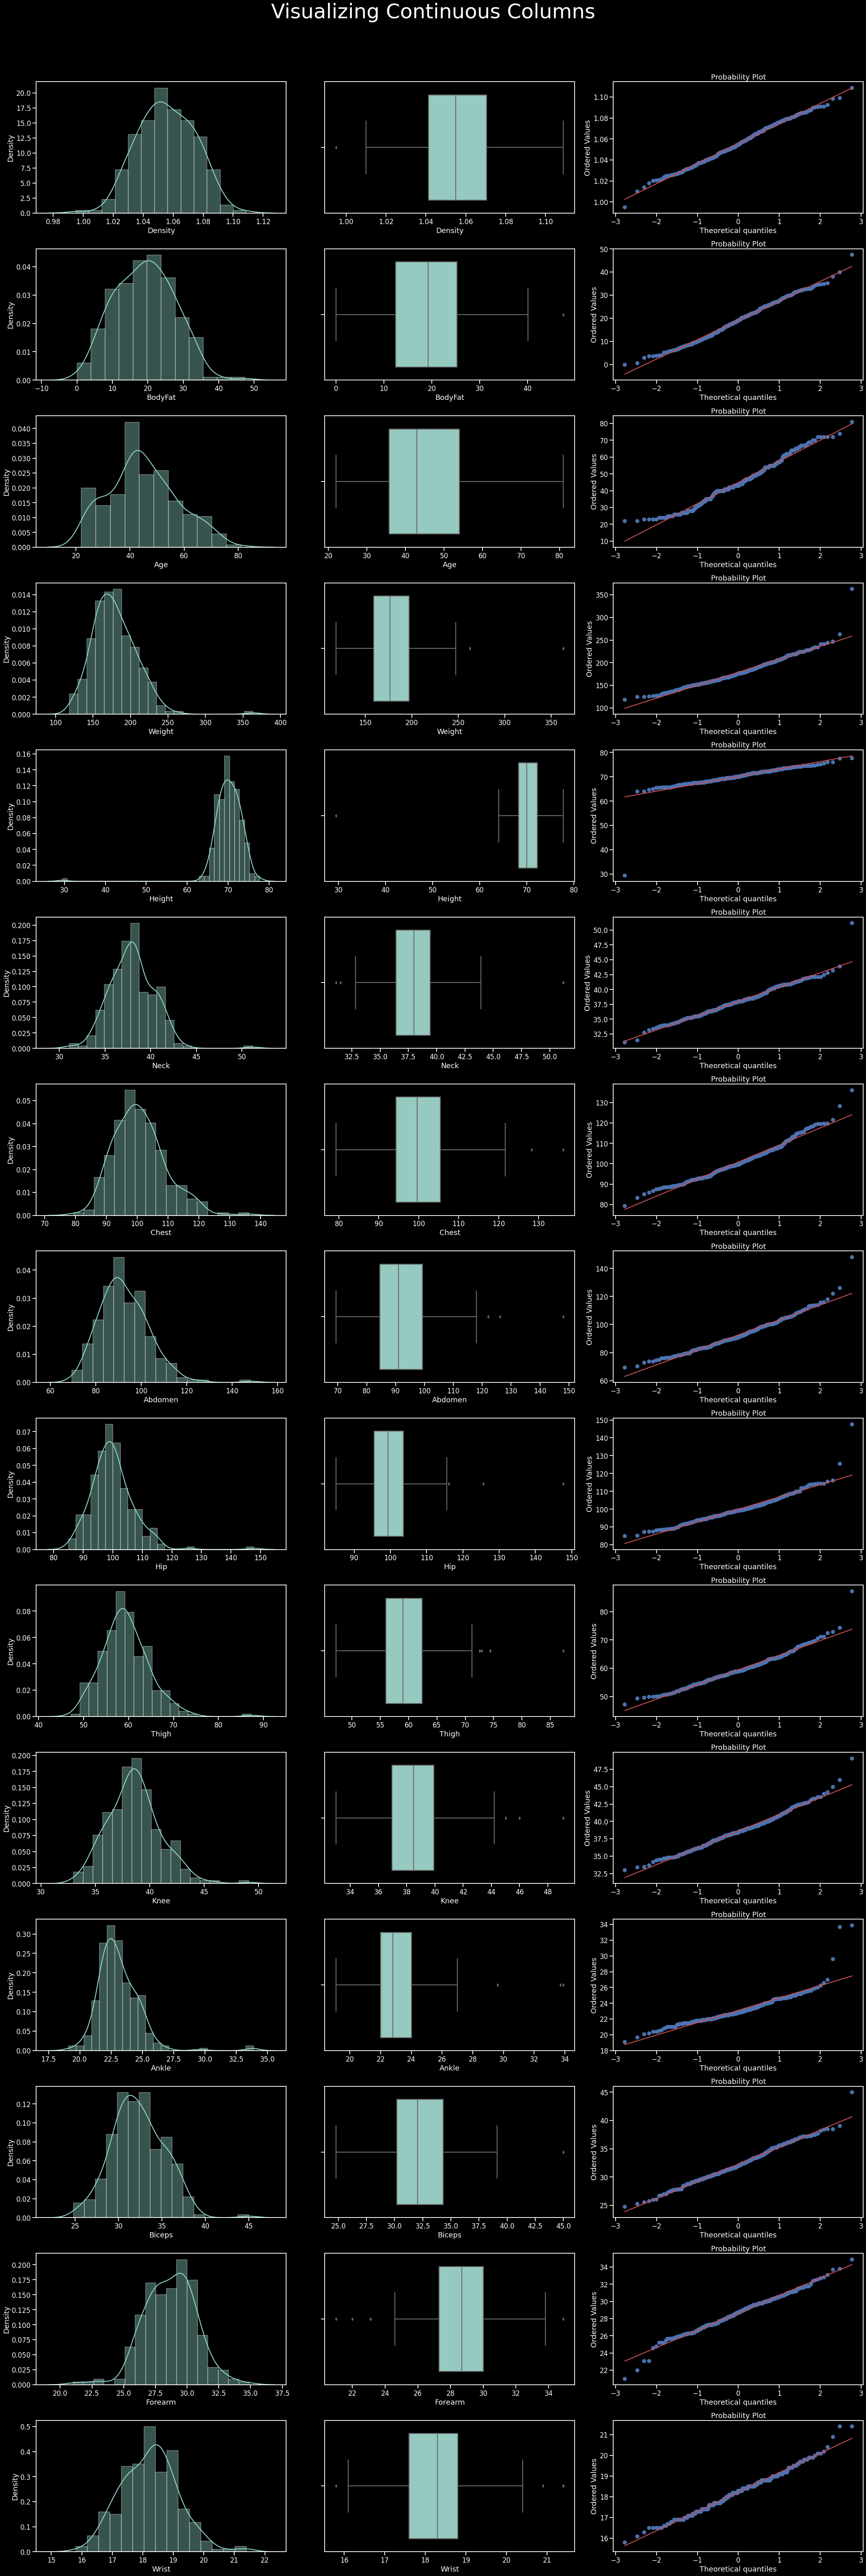

In [8]:
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(df.columns):
    sns.distplot(df[i],ax=ax[index,0])
    sns.boxplot(df[i],ax=ax[index,1])
    stats.probplot(df[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=50)

**Observation**

1) Data has some outliers

    1) Could be a general outlier maybe somebody could have body structure like that
    
    2) Could be a mistake in recording the dataset
    
2) Some columns have Skewness



In [9]:
print(f'-------Column Skewness------\n{df.skew(axis=0).sort_values()}')  # checking for skewness

-------Column Skewness------
Height    -5.384987
Forearm   -0.219333
Density   -0.020176
BodyFat    0.146353
Wrist      0.281614
Age        0.283521
Biceps     0.285530
Knee       0.516744
Neck       0.552620
Chest      0.681556
Thigh      0.821210
Abdomen    0.838418
Weight     1.205263
Hip        1.497127
Ankle      2.255134
dtype: float64


Column such as *Weight*, *Hip*, *Ankle* have high skewness

<AxesSubplot:>

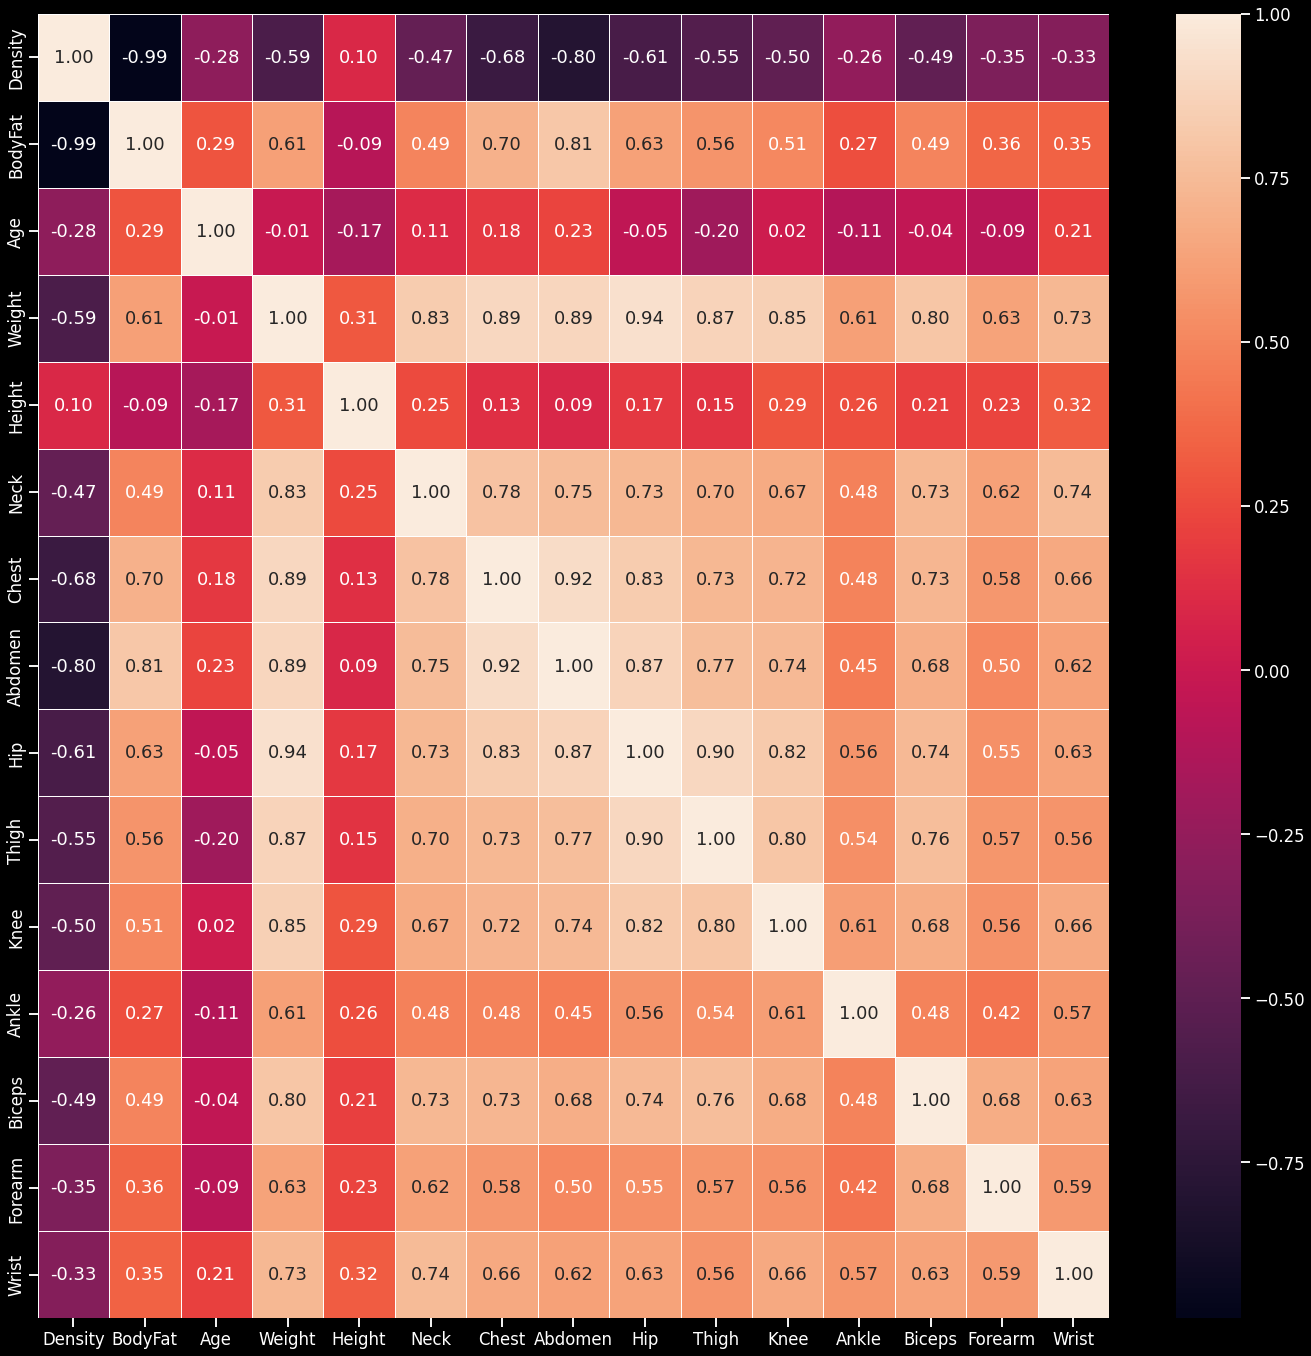

In [10]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")  # Checking for collineraity in Dataset

**Observation**

1) Data has multicollinearity

**We will convert the values of Weight and Height to Kg and cm respectively as other data values are in those SI Units**

In [11]:
df['Weight'] /= 2.2 # converallting to kg
df['Height'] *= 2.5 # converting to cm
df['Height'] /= 100 # converting to m

In [12]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,70.113636,1.69375,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,78.750000,1.80625,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,70.000000,1.65625,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,83.977273,1.80625,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,83.750000,1.78125,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [13]:
df['Weight'] = round(df['Weight'], 2)

In [14]:
df['Height'] = round(df['Height'], 2)

In [15]:
df['Density'] = round(df['Density'], 2)

**BMI: Body Mass Index**

In [16]:
df['BMI'] = round(df['Weight']/(df['Height']**2), 2) # Creating a new data column BMI(Body Mass Index)

In [17]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.07,12.3,23,70.11,1.69,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,24.55
1,1.09,6.1,22,78.75,1.81,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,24.04
2,1.04,25.3,22,70.00,1.66,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.40
3,1.08,10.4,26,83.98,1.81,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,25.63
4,1.03,28.7,24,83.75,1.78,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,26.43


In [18]:
data = df.copy() # Copying the df Dataframe into Data (we will be using Data Dataframe for visualization)

In [19]:
data['LeanPercent'] = 100 - data['BodyFat'] # creating the lean body mass column
data['FatFreeMass'] = data['Weight'] * data['LeanPercent'] / 100 # calculating the fat free mass (or lean mass)
data['FFMI'] = data['FatFreeMass'] / (data['Height']**2) #calculating Fat Free Mass Index

#rouding the value to 1 decimal
data['FatFreeMass'] = round(data['FatFreeMass'], 2)
data['FFMI'] = round(data['FFMI'], 2)

In [20]:
#initializing the columns
data['Underweight'] = 0
data['Healthy Weight'] = 0
data['Over Weight'] = 0
data['Obese'] = 0
data['HighFat'] = 0

#changing the value
data['Underweight'][df['BMI']<18.50] = 1
data['Healthy Weight'][(df['BMI'] >= 18.50) & (df['BMI'] <=24.97)] = 1
data['Over Weight'][(df['BMI'] > 25) & (df['BMI'] <=29.9)] = 1
data['Obese'][df['BMI'] > 30] = 1
data['HighFat'][data['BodyFat']>=22] = 1

The Threshold is taken from Wikipedia [Wiki](https://en.wikipedia.org/wiki/Body_mass_index)

In [21]:
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,...,Wrist,BMI,LeanPercent,FatFreeMass,FFMI,Underweight,Healthy Weight,Over Weight,Obese,HighFat
0,1.07,12.3,23,70.11,1.69,36.2,93.1,85.2,94.5,59.0,...,17.1,24.55,87.7,61.49,21.53,0,1,0,0,0
1,1.09,6.1,22,78.75,1.81,38.5,93.6,83.0,98.7,58.7,...,18.2,24.04,93.9,73.95,22.57,0,1,0,0,0
2,1.04,25.3,22,70.00,1.66,34.0,95.8,87.9,99.2,59.6,...,16.6,25.40,74.7,52.29,18.98,0,0,1,0,1
3,1.08,10.4,26,83.98,1.81,37.4,101.8,86.4,101.2,60.1,...,18.2,25.63,89.6,75.25,22.97,0,0,1,0,0
4,1.03,28.7,24,83.75,1.78,34.4,97.3,100.0,101.9,63.2,...,17.7,26.43,71.3,59.71,18.85,0,0,1,0,1


In [22]:
data['Underweight'].value_counts() # Counting the number of Underweight Rows

0    252
Name: Underweight, dtype: int64

*We can see we only have zero Underweight Individual. We can see that Underweight was not that common test group, thus we can just remove this coulmn even then this gives us some info about the data.*

In [23]:
data.drop(['Underweight'], inplace = True, axis = 1)

In [24]:
data['Healthy Weight'].value_counts() # Counting the number of Healthy Weight Rows

0    150
1    102
Name: Healthy Weight, dtype: int64

*We can see that we have fairly good amount of Healthy weight individuals*

In [25]:
data['Over Weight'].value_counts()

0    144
1    108
Name: Over Weight, dtype: int64

*We can see that we have many overweight individuals*

In [26]:
data['Obese'].value_counts()

0    211
1     41
Name: Obese, dtype: int64

*We have enough number of Obese rows that we can consider this as important enough value that we can use them to get more data about this dataset*

In [27]:
data['BMI'].max()

170.16

In [28]:
data['BodyFat'].max()

47.5

In [29]:
data['FFMI'].max()

114.18

In [30]:
data['FFMI'][data['FFMI'] > 25].value_counts()

25.08     1
25.53     1
32.65     1
26.44     1
114.18    1
25.54     1
25.63     1
Name: FFMI, dtype: int64

In [31]:
data[data['FFMI'] > 25].head(7)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,...,Forearm,Wrist,BMI,LeanPercent,FatFreeMass,FFMI,Healthy Weight,Over Weight,Obese,HighFat
11,1.08,7.8,27,98.18,1.90,39.4,103.6,90.9,107.7,66.2,...,30.2,19.0,27.20,92.2,90.52,25.08,0,1,0,0
21,1.06,15.2,28,91.14,1.74,41.3,111.4,98.8,104.8,63.4,...,32.8,19.9,30.10,84.8,77.29,25.53,0,0,1,0
38,1.02,35.2,46,165.07,1.81,51.2,136.2,148.1,147.7,87.3,...,29.0,21.4,50.39,64.8,106.97,32.65,0,0,1,1
40,1.02,34.5,45,119.43,1.72,43.2,128.3,126.2,125.6,72.5,...,32.7,21.4,40.37,65.5,78.23,26.44,0,0,1,1
41,1.02,32.9,44,93.18,0.74,36.6,106.0,104.3,115.5,70.6,...,28.7,17.4,170.16,67.1,62.52,114.18,0,0,1,1
151,1.05,19.6,26,109.89,1.86,41.8,108.3,102.9,114.4,72.9,...,33.8,19.6,31.76,80.4,88.35,25.54,0,0,1,0
179,1.06,16.9,39,106.70,1.86,42.8,109.5,104.5,109.9,69.5,...,32.5,19.9,30.84,83.1,88.67,25.63,0,0,1,0


In [32]:
print(data[data['BodyFat'] < 3]) # people with extremly low body-fat (under essential fat threshold)
print(data[data['BMI'] > 50]) #extreme BMI outliers
print(data[data['FFMI'] > 25]) #FFMI natural limit

     Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  \
171     1.10      0.7   35   57.16    1.64  34.0   90.8     75.0  89.2   50.0   
181     1.11      0.0   40   53.86    1.70  33.8   79.3     69.4  85.0   47.2   

     ...  Forearm  Wrist    BMI  LeanPercent  FatFreeMass   FFMI  \
171  ...     25.9   16.9  21.25         99.3        56.76  21.10   
181  ...     24.6   16.5  18.64        100.0        53.86  18.64   

     Healthy Weight  Over Weight  Obese  HighFat  
171               1            0      0        0  
181               1            0      0        0  

[2 rows x 23 columns]
    Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
38     1.02     35.2   46  165.07    1.81  51.2  136.2    148.1  147.7   87.3   
41     1.02     32.9   44   93.18    0.74  36.6  106.0    104.3  115.5   70.6   

    ...  Forearm  Wrist     BMI  LeanPercent  FatFreeMass    FFMI  \
38  ...     29.0   21.4   50.39         64.8       106.97   32

In [33]:
data.drop([171, 181], axis=0, inplace=True)
data.drop([38, 41], axis=0, inplace=True)
data.drop([11, 21, 40, 151, 179], axis=0, inplace=True)

In [34]:
data['Age'].min()

22

*As we can see we have minimum age of 22 and for most men the BMI is a valuable index and thus we don't have to worry about age*

In [35]:
data.shape

(243, 23)

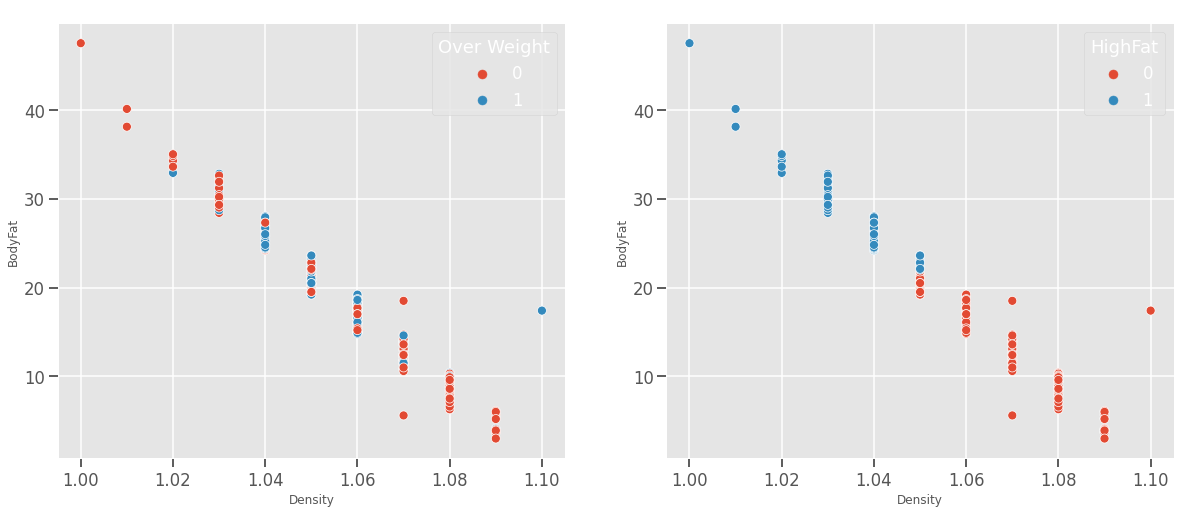

In [36]:
plt.style.use('ggplot')

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(20,8))

sns.scatterplot(ax=ax[0], data=data, x='Density', y='BodyFat', hue='Over Weight')
ax[0].set_title('splitted by BMI')

ax[1] = sns.scatterplot(ax=ax[1], data=data, x='Density', y='BodyFat', hue='HighFat')
ax[1].set_title('splitted by Fat level')

plt.show()

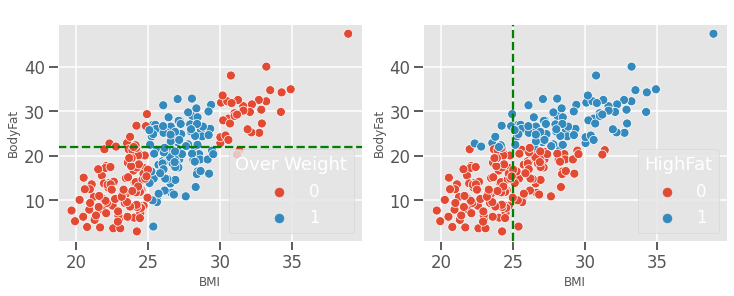

In [37]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12,4))

sns.scatterplot(ax=ax[0], data=data, x='BMI', y='BodyFat', hue='Over Weight')
ax[0].set_title("splitted by BMI")
ax[0].axhline(y=22, linestyle='--', color='green')

sns.scatterplot(ax=ax[1], data=data, x='BMI', y='BodyFat', hue='HighFat')
ax[1].set_title('splitted by Fat Level')
ax[1].axvline(x=25, linestyle='--', color='green')

plt.show()

<AxesSubplot:xlabel='BMI', ylabel='BodyFat'>

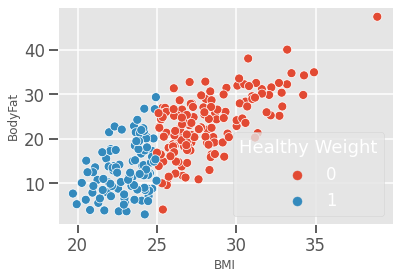

In [38]:
sns.scatterplot(data=data, x='BMI', y='BodyFat', hue = 'Healthy Weight')

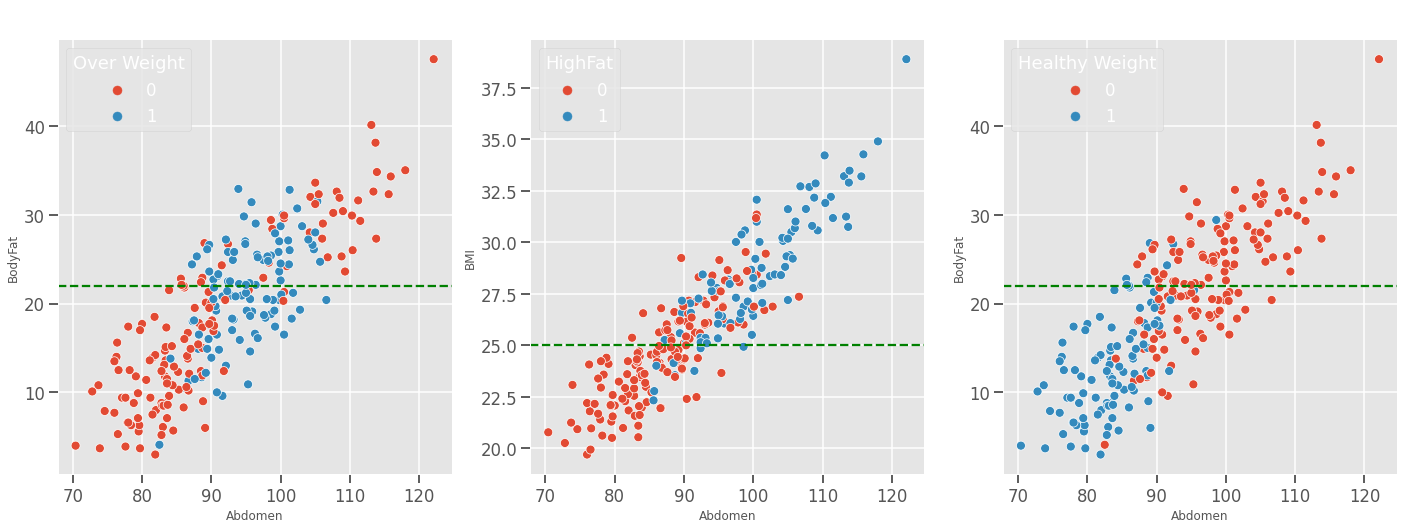

In [39]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(24, 8))

sns.scatterplot(ax=ax[0], data=data, x='Abdomen', y='BodyFat', hue='Over Weight')
ax[0].set_title('abdominal circumference vs. body-fat level \n(splitted by weight)')
ax[0].axhline(y=22, color='green', linestyle='--')

sns.scatterplot(ax=ax[1], data=data, x='Abdomen', y='BMI', hue='HighFat')
ax[1].set_title('abdominal circumference vs. BMI \n(splitted by fat-level)')
ax[1].axhline(y=25, color='green', linestyle='--')

sns.scatterplot(ax=ax[2], data=data, x='Abdomen', y='BodyFat', hue='Healthy Weight')
ax[2].set_title('abdominal circumference vs. body-fat level \n(splitted by weight)')
ax[2].axhline(y=22, color='green', linestyle='--')

plt.show()

Normal range for abdomen circumference range between 70 to 90 cm for men. (75 to 85 cm using stricter standard)

A larger abdomen is usually a sign of obesity, even when the body looks lean. A large adominal circumference without much subcutaneous fat is a sign of visceral obesity. Visceral obesity is common in men and is a factor of metabolic disorder and hearth problem

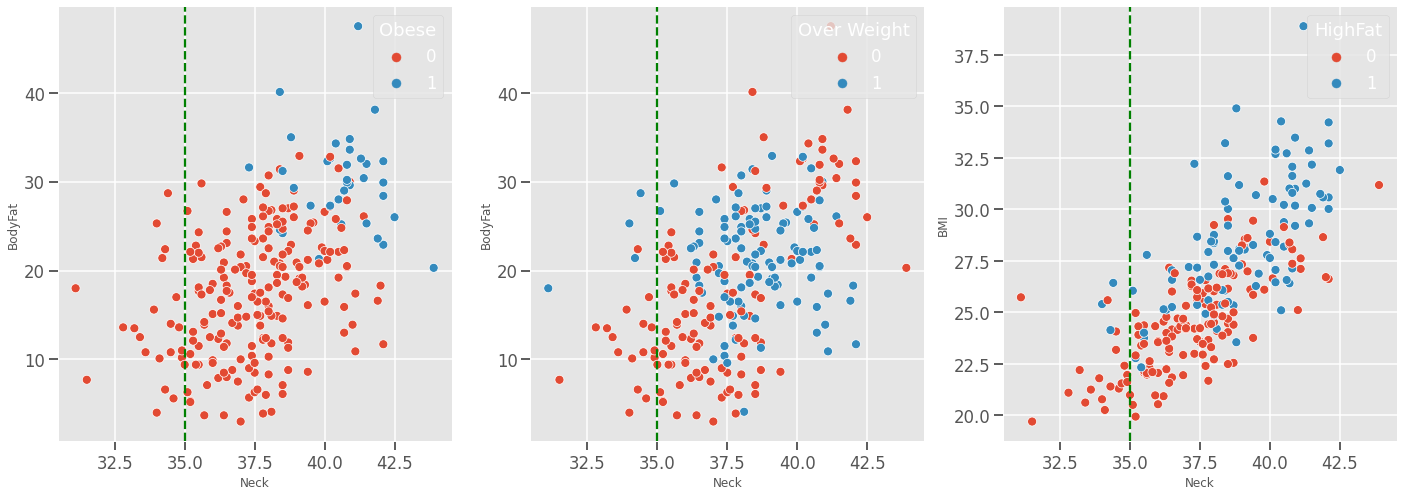

In [40]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(24, 8))

sns.scatterplot(ax=ax[0], data=data, x='Neck', y='BodyFat', hue='Obese')
#ax[0].set_title('abdominal circumference vs. body-fat level \n(splitted by weight)')
ax[0].axvline(x=35, color='green', linestyle='--')

sns.scatterplot(ax=ax[1], data=data, x='Neck', y='BodyFat', hue='Over Weight')
#ax[0].set_title('abdominal circumference vs. body-fat level \n(splitted by weight)')
ax[1].axvline(x=35, color='green', linestyle='--')


sns.scatterplot(ax=ax[2], data=data, x='Neck', y='BMI', hue='HighFat')
#ax[1].set_title('abdominal circumference vs. BMI \n(splitted by fat-level)')
ax[2].axvline(x=35, color='green', linestyle='--')

In [41]:
data['FFMI'].mean()

20.879588477366255

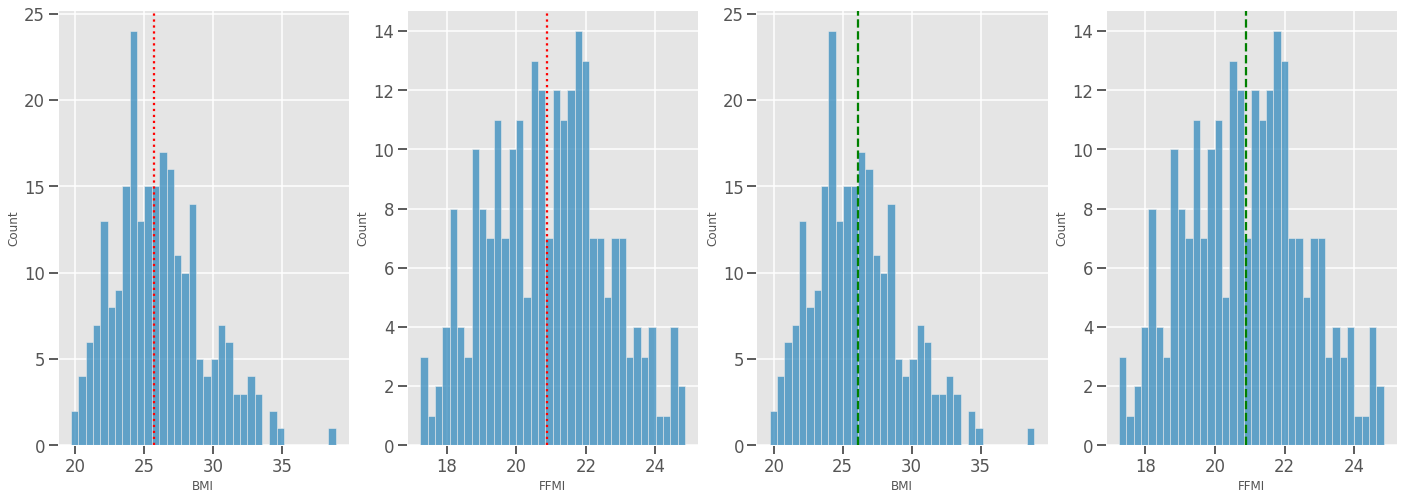

In [42]:
fig, ax = plt.subplots(1, 4, sharex=False, figsize=(24, 8))

sns.histplot(ax=ax[0], data=data, x='BMI', bins=36)
ax[0].axvline(data['BMI'].median(), color='red', linestyle=':')

sns.histplot(ax=ax[1], data=data, x='FFMI', bins=36)
ax[1].axvline(data['FFMI'].median(), color='red', linestyle=':')

sns.histplot(ax=ax[2], data=data, x='BMI', bins=36)
ax[2].axvline(data['BMI'].mean(), color='Green', linestyle='--')

sns.histplot(ax=ax[3], data=data, x='FFMI', bins=36)
ax[3].axvline(data['FFMI'].mean(), color='Green', linestyle='--')

plt.show()

In [43]:
import plotly.express as px

count = data['Over Weight'].value_counts()
#print(count) #checking the value to map the good label
colors=px.colors.sequential.RdBu
fig = px.pie(count, names=['True', 'False'], values=count.values, color_discrete_sequence=colors)
fig.show()

In [44]:
count = data.Obese.value_counts()
#print(count) #checking the value to map the good label
fig = px.pie(count, names=['Not Obese', 'Obese'], values=count.values)
fig.show()

In [45]:
count = data.HighFat.value_counts()
#print(count) # checking the value to map the good label
colors=px.colors.sequential.Rainbow
fig = px.pie(count, names=['Normal', 'High Fat'], values=count.values, color_discrete_sequence=colors)
fig.show()

In [46]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.07,12.3,23,70.11,1.69,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,24.55
1,1.09,6.1,22,78.75,1.81,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,24.04
2,1.04,25.3,22,70.00,1.66,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.40
3,1.08,10.4,26,83.98,1.81,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,25.63
4,1.03,28.7,24,83.75,1.78,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,26.43


In [47]:
X = df.drop(['BodyFat','Density'],axis=1)
y = df['Density']

In [48]:
X.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,23,70.11,1.69,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,24.55
1,22,78.75,1.81,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,24.04
2,22,70.00,1.66,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.40
3,26,83.98,1.81,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,25.63
4,24,83.75,1.78,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,26.43


In [49]:
y.head()

0    1.07
1    1.09
2    1.04
3    1.08
4    1.03
Name: Density, dtype: float64

In [50]:
X['CtoH'] = round(X['Chest']/X['Hip'], 2)

In [51]:
X.drop(['Chest', 'Hip'], axis = 1, inplace = True)

In [52]:
z = np.abs(stats.zscore(X))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
X_clean = X[(z<3).all(axis=1)]
y_clean = y[(z<3).all(axis=1)]
#find how many rows are left in the dataframe 
X_clean.shape

(241, 13)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_clean,random_state=42)

In [54]:
trans = PowerTransformer()
X_train = trans.fit_transform(X_train)
X_test = trans.transform(X_test)

In [55]:
kernel = KernelRidge()
lgbm = LGBMRegressor()
random = RandomForestRegressor()
linear = LinearRegression()
elastic = ElasticNet()
lasso  = Lasso()
ridge = Ridge()
svr=SVR()
grad = GradientBoostingRegressor()
sgd = SGDRegressor()
bay = BayesianRidge()
clf = [linear,elastic,lasso,ridge,svr,grad,sgd,bay,random,kernel,lgbm]
hashmap={}

In [56]:
from sklearn.metrics import mean_squared_error
def compute(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    hashmap[str(model)]=(r2,rmse)

In [57]:
for i in clf:
    compute(i)

In [58]:
score=pd.DataFrame(hashmap)
score = score.transpose()
score.columns=['R2_score','RMSE']
score = score.sort_values('R2_score',ascending=False)
score

,R2_score,RMSE
LinearRegression(),0.763669,0.010540
Ridge(),0.759874,0.010625
BayesianRidge(),0.756072,0.010708
RandomForestRegressor(),0.666198,0.012527
LGBMRegressor(),0.645349,0.012912
GradientBoostingRegressor(),0.602854,0.013664
SGDRegressor(),0.487900,0.015516
ElasticNet(),-0.000627,0.021688
Lasso(),-0.000627,0.021688
SVR(),-0.001729,0.021700


Text(0.5, 1.0, 'Actual Vs Predicted')

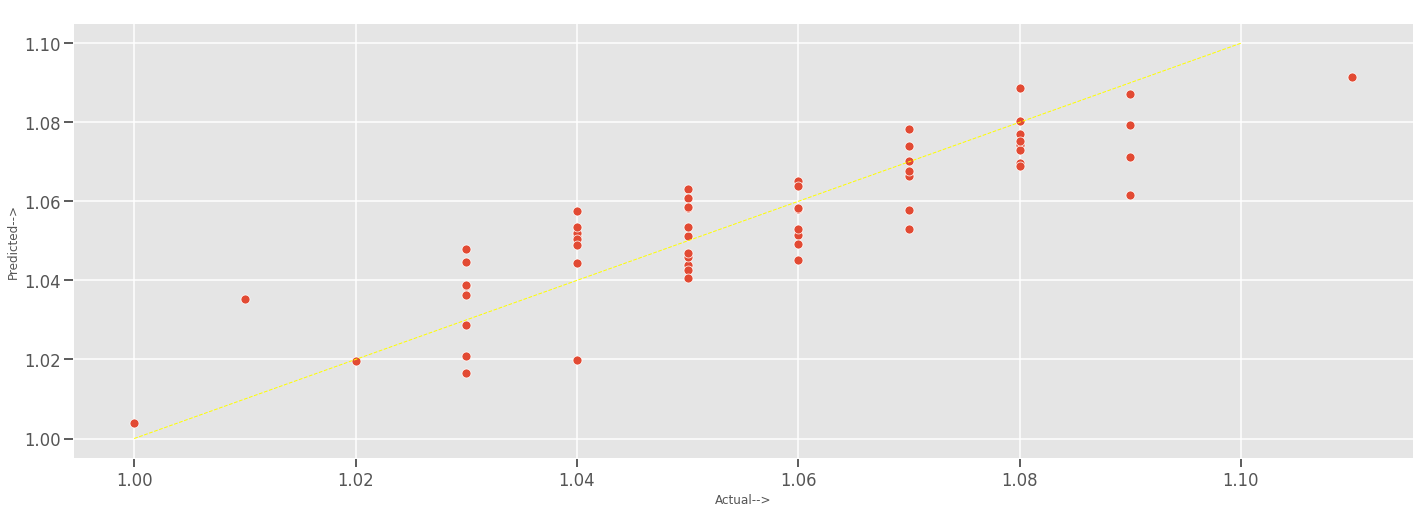

In [59]:
plt.figure(figsize=(24, 8))
y_pred = ridge.predict(X_test)
sns.scatterplot(y_test,y_pred)
plt.plot([1.00, 1.10], [1.00, 1.10], color = 'Yellow',linestyle='--',linewidth=1)
plt.xlabel("Actual-->")
plt.ylabel("Predicted-->")
plt.title("Actual Vs Predicted")

In [60]:
y_pred

array([1.078261  , 1.05826669, 1.05152988, 1.07014428, 1.06639173,
       1.09152826, 1.05809297, 1.05308825, 1.07410846, 1.06505307,
       1.08725991, 1.00397418, 1.05132293, 1.07697888, 1.06981962,
       1.08024261, 1.06320738, 1.04396964, 1.06905891, 1.05192109,
       1.02860534, 1.04512084, 1.05349838, 1.07128157, 1.03524285,
       1.0513154 , 1.08044115, 1.04582631, 1.05354671, 1.05783936,
       1.06754838, 1.06156716, 1.07921646, 1.03869633, 1.05799627,
       1.04260728, 1.06082978, 1.03872649, 1.08872007, 1.01669196,
       1.04806524, 1.05834856, 1.05756442, 1.04476926, 1.06073564,
       1.07431114, 1.0503635 , 1.02097479, 1.04071875, 1.04892314,
       1.04912059, 1.05293238, 1.05857169, 1.0468687 , 1.04446073,
       1.07291643, 1.01970006, 1.06387248, 1.03624793, 1.01975566,
       1.07521258])

In [61]:
y_test

24     1.07
6      1.05
231    1.06
216    1.07
247    1.07
       ... 
168    1.02
184    1.06
156    1.03
237    1.04
160    1.08
Name: Density, Length: 61, dtype: float64

In [62]:
import pickle
pickle.dump(trans,open('transformer.pkl','wb'))
pickle.dump(linear,open('model.pkl','wb'))